First few rows of the California Housing dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


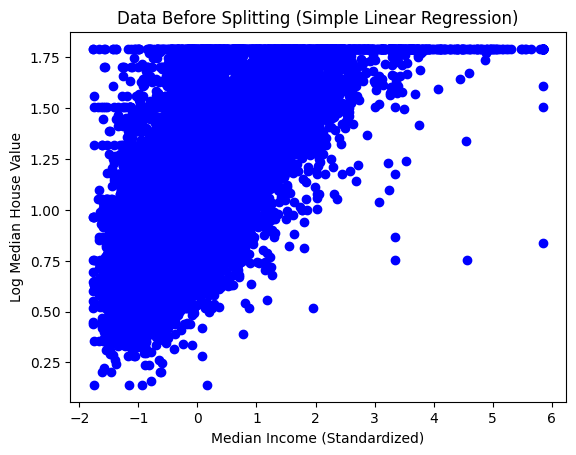

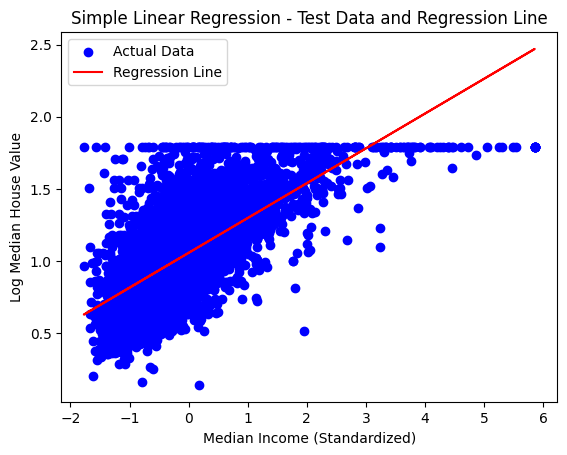


Simple Linear Regression - Actual vs Predicted Values:
    Actual  Predicted
0  0.47700   1.176333
1  0.45800   1.424593
2  5.00001   1.735264
3  2.18600   2.644024
4  2.78000   1.821722

Simple Linear Regression - Mean Squared Error (MSE): 0.06998237336253325
Simple Linear Regression - R-squared: 0.44477989453958466

Multiple Linear Regression - Actual vs Predicted Values:
    Actual  Predicted
0  0.47700   0.873079
1  0.45800   1.667987
2  5.00001   2.448804
3  2.18600   2.717391
4  2.78000   2.523999

Multiple Linear Regression - Mean Squared Error (MSE): 0.05034011172872022
Multiple Linear Regression - R-squared: 0.6006159722803464


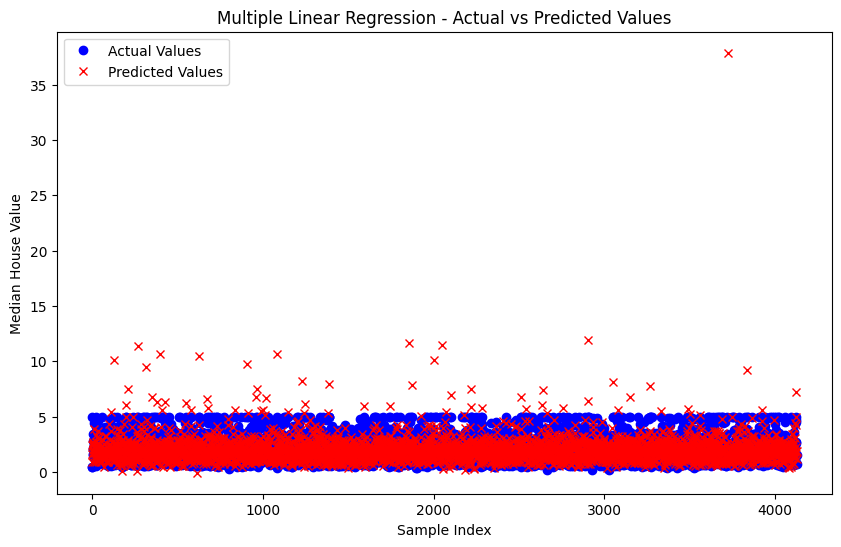

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Load the California Housing dataset
california = datasets.fetch_california_housing()

# Convert dataset to a pandas DataFrame for better visualization
data = pd.DataFrame(california.data, columns=california.feature_names)
data['target'] = california.target

# Display the first few rows of the dataset
print("First few rows of the California Housing dataset:")
print(data.head())

# ---------------- Data Preprocessing ----------------

# Log-transform the target to handle skewness
data['target'] = np.log1p(data['target'])

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[california.feature_names])

# Update the DataFrame with scaled features
data[california.feature_names] = scaled_features

# ---------------- Simple Linear Regression ----------------

# Use only one feature (e.g., the 'MedInc' - median income) for simple linear regression
X_simple = data[['MedInc']].values  # Selecting median income as the feature
y = data['target'].values  # Log-transformed target variable (median house value)

# Display data before splitting
plt.scatter(X_simple, y, color='blue')
plt.title('Data Before Splitting (Simple Linear Regression)')
plt.xlabel('Median Income (Standardized)')
plt.ylabel('Log Median House Value')
plt.show()

# Split the data into training (80%) and testing (20%) sets for simple linear regression
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Create a LinearRegression model for simple linear regression
model_simple = LinearRegression()

# Train the model on the training data
model_simple.fit(X_train_simple, y_train)

# Predict the target values for the test set
y_pred_simple = model_simple.predict(X_test_simple)

# Plot the test data points and the regression line for simple linear regression
plt.scatter(X_test_simple, y_test, color='blue', label='Actual Data')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.title('Simple Linear Regression - Test Data and Regression Line')
plt.xlabel('Median Income (Standardized)')
plt.ylabel('Log Median House Value')
plt.legend()
plt.show()

# Display the actual vs predicted values as a table for simple linear regression
simple_results = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(y_pred_simple)})
print("\nSimple Linear Regression - Actual vs Predicted Values:")
print(simple_results.head())

# Calculate Mean Squared Error (MSE) and R-squared for simple linear regression
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f'\nSimple Linear Regression - Mean Squared Error (MSE): {mse_simple}')
print(f'Simple Linear Regression - R-squared: {r2_simple}')

# ---------------- Multiple Linear Regression ----------------

# Use all features for multiple linear regression
X_multiple = data[california.feature_names].values  # All scaled features
y = data['target'].values  # Log-transformed target variable

# Split the data into training (80%) and testing (20%) sets for multiple linear regression
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create a LinearRegression model for multiple linear regression
model_multiple = LinearRegression()

# Train the model on the training data
model_multiple.fit(X_train_multiple, y_train)

# Predict the target values for the test set
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Display the actual vs predicted values as a table for multiple linear regression
multiple_results = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(y_pred_multiple)})
print("\nMultiple Linear Regression - Actual vs Predicted Values:")
print(multiple_results.head())

# Calculate Mean Squared Error (MSE) and R-squared for multiple linear regression
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f'\nMultiple Linear Regression - Mean Squared Error (MSE): {mse_multiple}')
print(f'Multiple Linear Regression - R-squared: {r2_multiple}')

# Plot actual vs predicted values for multiple linear regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), np.expm1(y_test), color='blue', marker='o', linestyle='', label='Actual Values')
plt.plot(range(len(y_pred_multiple)), np.expm1(y_pred_multiple), color='red', marker='x', linestyle='', label='Predicted Values')
plt.title('Multiple Linear Regression - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.show()
